<a href="https://colab.research.google.com/github/Sundar2408/Fashion-Sales/blob/main/Fashion_Product_Sales_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Data Loading

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Fashion_Retail_Sales.csv')

#Data Analysis and Preprocessing

In [ ]:
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [ ]:
df.tail()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
3395,4118,Shorts,37.0,2023-07-09,2.7,Cash
3396,4056,Slippers,176.0,2023-03-16,2.5,Cash
3397,3991,Onesie,NaN,2022-10-03,2.4,Credit Card
3398,4042,Sandals,128.0,2023-01-01,1.8,Cash
3399,4001,Backpack,115.0,2023-03-22,1.4,Cash


In [ ]:
df.isnull().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [ ]:
# filling missing values
df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean(), inplace=True)
df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

In [ ]:
# Drop irrelevant columns or columns that might cause data leakage (e.g., Date, ProductID)
df = df.drop(['Customer Reference ID'], axis=1)

In [ ]:
df = df.drop(['Date Purchase'], axis=1)

In [ ]:
df.head()

,Item Purchased,Purchase Amount (USD),Review Rating,Payment Method
0,Handbag,4619.0,2.999057,Credit Card
1,Tunic,2456.0,2.000000,Credit Card
2,Tank Top,2102.0,4.100000,Cash
3,Leggings,3126.0,3.200000,Cash
4,Wallet,3003.0,4.700000,Cash


In [ ]:
le = LabelEncoder()
df['Payment Method'] = le.fit_transform(df['Payment Method'])

#Splitting the data

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop('Item Purchased', axis=1)
y = df['Item Purchased']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model building

In [ ]:
# Train a Random Forest Regressor model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#Predictions

In [ ]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     Backpack       0.00      0.00      0.00        18
         Belt       0.00      0.00      0.00        14
       Blazer       0.06      0.07      0.06        15
       Blouse       0.00      0.00      0.00        12
        Boots       0.00      0.00      0.00        18
       Bowtie       0.00      0.00      0.00         8
     Camisole       0.04      0.10      0.06        10
     Cardigan       0.00      0.00      0.00        13
         Coat       0.07      0.09      0.08        11
        Dress       0.00      0.00      0.00        12
Flannel Shirt       0.00      0.00      0.00        14
   Flip-Flops       0.00      0.00      0.00        13
       Gloves       0.00      0.00      0.00        17
      Handbag       0.00      0.00      0.00        13
          Hat       0.00      0.00      0.00        14
       Hoodie       0.00      0.00      0.00        22
       Jacket       0.00      0.00      0

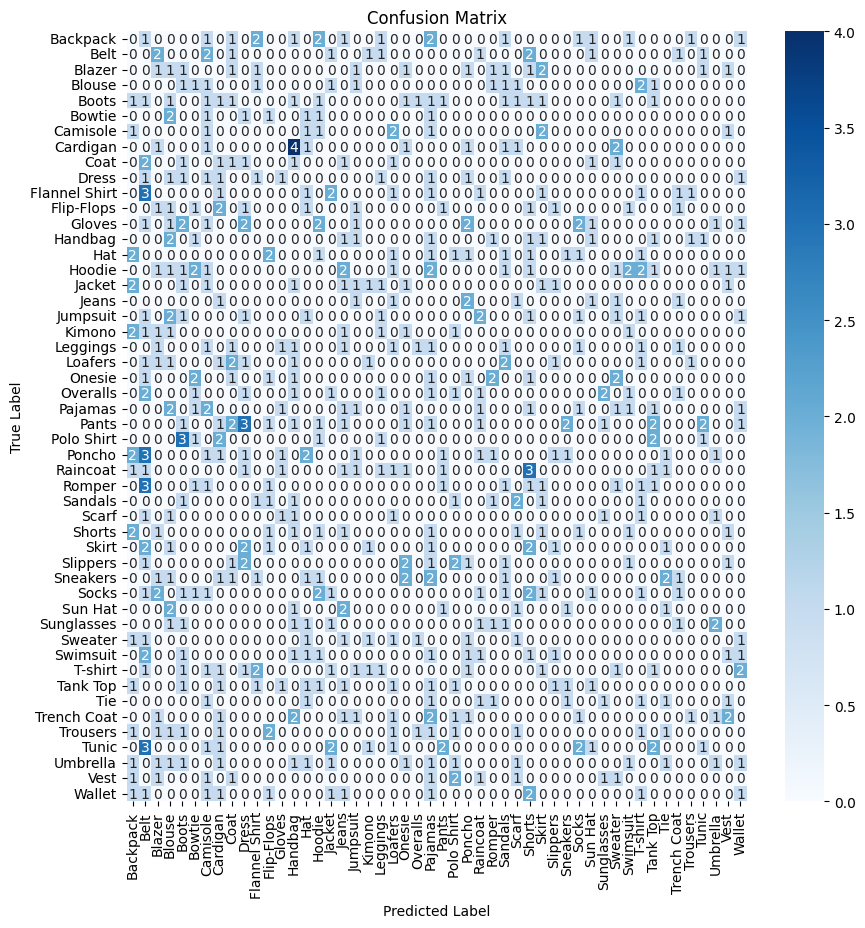

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Assuming df is your DataFrame
most_purchased_items = df['Item Purchased'].value_counts().reset_index()
most_purchased_items.columns = ['Item Purchased', 'PurchaseCount']

In [ ]:
# Display the most purchased items
print("Most Purchased Items:")
print(most_purchased_items)

Most Purchased Items:
   Item Purchased  PurchaseCount
0            Belt             90
1           Skirt             88
2          Shorts             87
3           Pants             86
4        Tank Top             82
5         T-shirt             82
6         Pajamas             81
7        Camisole             76
8         Loafers             76
9          Hoodie             75
10         Poncho             73
11          Socks             73
12         Kimono             73
13         Blouse             73
14         Wallet             73
15        Handbag             72
16       Cardigan             72
17           Vest             71
18       Sneakers             71
19         Onesie             71
20       Backpack             71
21         Blazer             71
22       Umbrella             70
23       Raincoat             69
24    Trench Coat             68
25            Hat             68
26     Sunglasses             67
27           Coat             67
28          Scarf    